# Training Models
## 1. Linear Regression
A linear regression makes a prediction by computing a weighed sum of input features, plus a constant the bias term, or the intercept term.
$$\hat{y} = \theta_0+\theta_1 x_1 + \theta_2 x_2 + \cdots +\theta_n x_n$$

Or, in a vectorized form:
$$\hat{y} = h_{\theta}(\mathbf{x})=\theta^T\mathbf{x}$$
Both $\theta$ and $\mathbf{x}$ should be a column vector, and $h_{\theta}$ is the hypothesis function using the model parameters $\theta$.

Performance of a linear regression model could be evaluated by computing MSE, since it is easier for calculation and leads to the same result.
$$MSE(\mathbf{X},h_{\theta})=\frac{1}{m}\sum_{i=1}^m(\theta^T \mathbf{x}^{(i)}-y^{(i)})^2$$

### 1.1 The Normal Equation
The closed-form solution minimizing the cost function is:
$$\hat{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$
Next, use some linear-looking data to test this equation.

Text(0, 0.5, 'y')

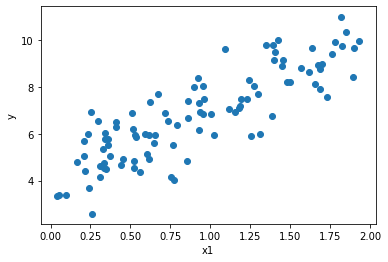

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2*np.random.rand(100,1) #generate array of size(a,b), all values in range of [0,1]
y = 4+3*X + np.random.randn(100,1) #generate array of size(a,b) with standard normal distribution N(0,1)
fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('x1')
ax.set_ylabel('y')

In [2]:
X_b = np.c_[np.ones((100,1)),X] #add x0 = 1 to all instances
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.04348251],
       [3.01879924]])

The actual function we used is:
$$y = 4x_0 + 3x_1 + noise$$
So the regression result is quite close to the expectation.

Now we could use $\hat{\theta}$ to make predictions.

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict#should be like [[4],[10]]

array([[ 4.04348251],
       [10.08108099]])

Plot the predictions.

Text(0, 0.5, 'y')

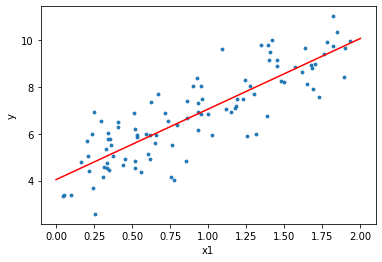

In [4]:
fig1,ax1 = plt.subplots()
ax1.scatter(X,y,s=8)
ax1.plot(X_new, y_predict, 'r-')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

$\hat{\theta}$ could also be computed by sklearn.

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.04348251] [[3.01879924]]
[[ 4.04348251]
 [10.08108099]]


### 1.2 Computational Complexity
The normal equation computes $\mathbf{X}^T\mathbf{X}$, which is an $n\times n$ matrix. The computational complexity is typically about $O(n^{2.4})$ to $O(n^{3})$, where $n$ is the number of features.

On the positive side, this equation in linear to the number of instances in the training set $O(m)$.

## 2. Gradient Descent
![gradient descent](GD.png)
An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. 

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

Scaling should always be done before training, otherwise or else it would take much longer to converge.

### 2.1 Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.
$$\frac{\partial}{\partial \theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^m (\theta^T \mathbf{x}^{(i)}-y^{(i)}) x_j^{(i)}$$

Or, in a vectorized form:
$$\nabla_{\theta}MSE(\theta)=\left( \begin{matrix}
\frac{\partial}{\partial \theta_0}MSE(\theta)\\
\frac{\partial}{\partial \theta_1}MSE(\theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\theta)\\
\end{matrix}\right)
=\frac{2}{m}\mathbf{X}^T (\mathbf{X}\theta - \mathbf{y})$$

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_{\theta}MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play:6 multiply the gradient vector by $\eta$ to determine the size of the downhill step.
$$\theta := \theta - \eta \nabla_{\theta}MSE(\theta)$$

In [6]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta*gradients
    
theta

array([[4.04348251],
       [3.01879924]])

This comes to the same answer as the normal equation, but what would happen if choosing a different $\eta$?
![learning rates](etas.png)
Grid search could be used to find the best $\eta$.

### 2.2 Stochastic Gradient Descent
BGD uses the whole training set to compute gradients at each step, which makes it pretty slow when the dataset is large. SGD, on the opposite extreme, uses only one instance per iteration for gradient computation.

SGD is much less regular than BGD. Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.
![SGD](SGD.png)
When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so SGD has a better chance of finding the global minimum than BGD does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [7]:
n_epochs = 50
t0,t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    eta = t0/(t+t1)
    return eta

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index].reshape((1,-1))
        yi = y[random_index].reshape((1,-1))
        gradient = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta -= eta*gradient

theta

array([[3.99273548],
       [3.04614711]])

Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set, then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly.

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y)
sgd_reg.intercept_, sgd_reg.coef_

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.9980594]), array([3.0340325]))

### 2.3 Mini-batch Gradient Descent
Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

#### Comparison of algorithms for Linear Regression
![paths](comp1.png)
![algo](comp2.png)

## 3. Polynomial Regression
For data that is more complex than a simple straight line, use a linear model to fit nonlinear data is still possible. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.

Text(0, 0.5, 'y')

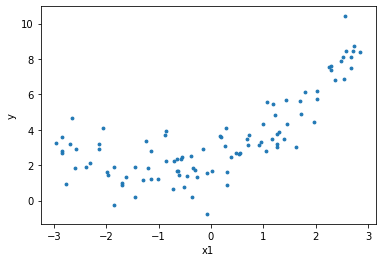

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

fig2,ax2 = plt.subplots()
ax2.scatter(X,y,s=8)
ax2.set_xlabel('x1')
ax2.set_ylabel('y')

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.72140903]
[0.72140903 0.52043098]


In [11]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly,y)
lin_reg_poly.intercept_, lin_reg.coef_

(array([2.1547546]), array([[3.01879924]]))

Text(0, 0.5, 'y')

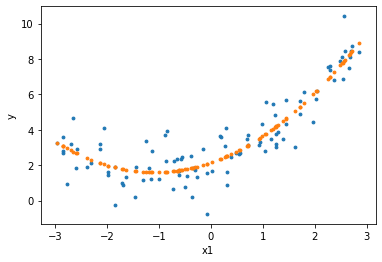

In [12]:
fig3,ax3 = plt.subplots()
ax3.scatter(X,y,s=8)
ax3.scatter(X,[lin_reg_poly.predict(x.reshape((1,-1)))[0][0] for x in X_poly],s=8)
ax3.set_xlabel('x1')
ax3.set_ylabel('y')

The estimation is:
$$\hat{y} = 2.00 + 1.06x + 0.54x^2$$
which is quite close to the original function:
$$y = 2+x+0.5x^2+noise$$

## 4. Learning Curves
![fitting](fitting.png)
This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it.

In most cases, the underlying pattern of data is unknown, so we need to measure the performance of each model. One way is to use cross validation.  If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

In [13]:
from sklearn.model_selection import cross_val_score as cvs
#mean absolute error
print('Linear Model: ', -cvs(lin_reg, X,y,scoring='neg_mean_absolute_error',cv=3))
print('Quadratic Model: ', -cvs(lin_reg_poly, X_poly,y,scoring='neg_mean_absolute_error',cv=3))

Linear Model:  [1.38631088 1.24446873 1.46409793]
Quadratic Model:  [0.85887397 0.71155605 0.73155735]


Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. 

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

Text(0, 0.5, 'RMSE')

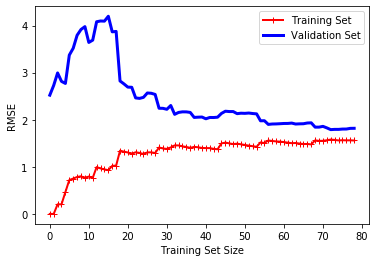

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend(['Training Set','Validation Set'])
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')

This is an underfitting model. Both curves have reached a plateau; they are close and fairly high. Adding more training examples will not help in this case, a more complex model or come up with better features will help.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data.

Text(0, 0.5, 'RMSE')

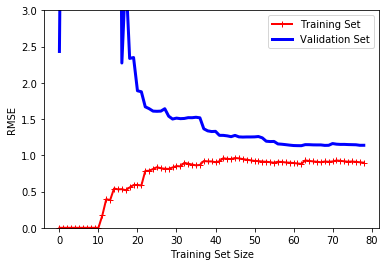

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((('poly_features',PolynomialFeatures(degree=10,include_bias=False)),\
                                ('lin_reg',LinearRegression())))

plot_learning_curves(polynomial_regression,X,y)
plt.ylim(0,3)
plt.legend(['Training Set','Validation Set'])
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')

This is an overfitting model, the error on the training data is much lower than with the Linear Regression model. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

## 5. Regularized Linear Models
### 5.1 Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression with a regularizaiton term of $\alpha \sum_{i=1}^n\theta_i^2$ added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.
$$J(\theta)=MSE(\theta)+\frac{\alpha}{2} \sum_{i=1}^n\theta_i^2$$
Note that $\theta_0$ is not regularized. If we define $\mathbf{w}$ as a vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply half of square of $\ell_2$ norm of $\mathbf{w}$.

The closed-form solution of Ridge Regression is:
$$\hat{\theta} = (\mathbf{X}^T\mathbf{X}+\alpha \mathbf{A})^{-1}\mathbf{X}^T \mathbf{y}$$

In [17]:
from sklearn.linear_model import Ridge
#closed-form solution
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.95843125]])

In [18]:
#ridge regression
sgd_reg_l2 = SGDRegressor(penalty='l2')
sgd_reg_l2.fit(X,y.flatten())
sgd_reg_l2.predict([[1.5]])

array([4.94305613])

### 5.2 Lasso Regression
The regulariztion term added to the cost function is $\ell_1$ norm od $\mathbf{w}$.
$$J(\theta)=MSE(\theta)+\alpha \sum_{i=1}^n|\theta_i|$$

In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.91020435])

In [20]:
sgd_reg_l1 = SGDRegressor(penalty='l1')
sgd_reg_l1.fit(X,y.flatten())
sgd_reg_l1.predict([[1.5]])

array([4.95084687])

### 5.3 Elastic Net
Mixture of Lasso and Ridge Regression.
$$J(\theta)=MSE(\theta)+r \alpha \sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha \sum_{i=1}^n\theta_i^2$$
$r$ could be used to weight two models.

In [21]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.91095479])

Whicn model to choose is an important problem. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. 

### 5.4 Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.
![early_stop](earlystop.png)

## 6. Logistic Regression
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class.

### 6.1 Estimating Probabilities
$$\hat{p}=h_{\theta}(\mathbf{x})=\sigma(\theta^T\mathbf{x})$$
Where $\sigma()$ is the sigmoid function:
$$\sigma(t)=\frac{1}{1+e^{-t}}$$
![sigmoid function](sigma.png)
Prediction could be given by:
$$\hat{y}=
\begin{cases}
0,& \hat{p}<0.5\\
1,& \hat{p}>=0.5\\
\end{cases}$$
Notice that if $\theta^T\mathbf{x}$ is positive, then a logistic model would predict 1, vise versa.

### 6.2 Training and Cost Function
The cost function for a single instance is:
$$c(\theta)=
\begin{cases}
-\log{(\hat{p})}& y=1\\
-\log{(1-\hat{p})}& y=0
\end{cases}$$
This makes sense because if the prediction is wrong, the cost would go ahead to nearly infinity.

The cost funciton for all instances is just the average of cost of each instance, given by:
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)}\log{\hat{p}^{(i)}}+(1-y^{(i)})\log{(1-\hat{p}^{(i)}})]$$

There is no closed-form solution for logistic regression. However, this problem is also convex, meaning that the global minimum could always be fetched by gradient descent if parameters are appropriate.

Gradient for each $\theta_j$ is given by:
$$\frac{\partial}{\partial \theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m \left(\sigma(\theta^T \mathbf{x}^{(i)})-y^{(i)}\right) x_j^{(i)}$$

### 6.3 Decision Boundaries
Use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

First train a binary classifer based on only one feature.

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:,3:]  #petal width 
y = (iris['target']==2).astype(np.int) #1 if Iris-Virginica, else 0 

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text([1.66261261], 0.8, '<-- Decision Boundary')

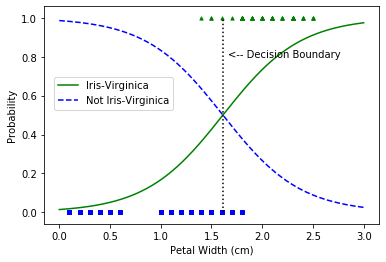

In [24]:
X_new = np.linspace(0,3,1000).reshape((-1,1))
y_proba = log_reg.predict_proba(X_new)

fig3,ax3 = plt.subplots()
ax3.plot(X_new,y_proba[:,1],'g-', label='Iris-Virginica')
ax3.plot(X_new,y_proba[:,0],'b--', label='Not Iris-Virginica')
ax3.legend(bbox_to_anchor=(0.4,0.7))
ax3.set_xlabel('Petal Width (cm)')
ax3.set_ylabel('Probability')
ax3.scatter(np.array(X[np.where(y==1)]),[1 for i in range(np.sum(y))],c='g',marker='^',s=10)
ax3.scatter(np.array(X[np.where(y==0)]),[0 for i in range(len(y)-np.sum(y))],c='b',marker='s',s=10)

decision_index = np.argmin(abs(y_proba[:,0]-y_proba[:,1]))
decision_boudary = X_new[decision_index]
ax3.plot([decision_boudary,decision_boudary],[0,1],'k:')
plt.text(decision_boudary+0.05,0.8,'<-- Decision Boundary')

Just like the other linear models, Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. Scitkit-Learn actually adds an $\ell_2$ penalty by default. The strength of regularization is controlled by $C$, smaller $C$ means stronger regularization.

### 6.4 Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

When given an instance $\mathbf{x}$, the Softmax Regression model first computes a score $s_k(\mathbf{x})$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.
$$s_k(\mathbf{x})=\theta_k^T\mathbf{x}$$

Note that each $\theta_k$ is a column vector of class k. All $\theta_k$ constitude a parameter matrix $\Theta$, with each row corresponding to one $\theta_k$. The probability $\hat{p}_k$ that the instance belongs to class k is given by:
$$\hat{p}_k=\sigma(\mathbf{s(x)})_k=\frac{exp(s_k(\mathbf{x}))}{\sum_{j=1}^K exp(s_j(\mathbf{x}))}$$
where $K$ is number of classes.

Then the class with the highest probability is:
$$\hat{y}=argmax_k\{ \sigma(\mathbf{s(x)})_k\} = argmax_k \{s_k(\mathbf{x})\} = argmax_k \{\theta_k^T\mathbf{x}\}$$

The cost function is called cross entropy, inside which $y_k^{(i)}$ is 1 if prediction of instance $i$ equals to $k$, otherwise it is zero.
$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^{(i)}\log \hat{p}_k^{(i)}$$

If $K=2$, then this function is just the same as the cost function for logistic regression.

Gradient vector for each $\theta_k$ is:
$$\nabla_{\theta_k}J(\Theta)=\frac{1}{m}\sum_{i=1}^m \left(\hat{p}_k^{(i)}-y_k^{(i)}\right)\mathbf{x}^{(i)}$$

Let's classify iris flowers into three classes.

In [25]:
X = iris['data'][:,2:4] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
